In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

In [ ]:
iris = load_iris()
data = iris.data
target = iris.target

xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.1)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

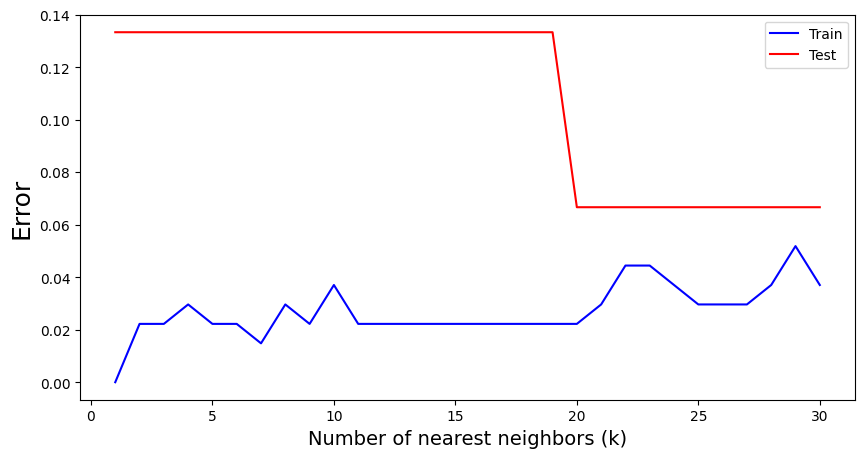

In [ ]:
train_error = []
test_error = []

for k in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors= k)
  knn.fit(xtrain_scaled, ytrain)

  ypred1 = knn.predict(xtrain_scaled)
  train_error.append(np.mean(ytrain != ypred1))

  ypred2 = knn.predict(xtest_scaled)
  test_error.append(np.mean(ytest != ypred2))

# Move the plotting code outside of the for loop
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), train_error, color='b', label="Train")
plt.plot(range(1, 31), test_error, color='r', label="Test")
plt.xlabel('Number of nearest neighbors (k)', fontsize=14)
plt.ylabel('Error', fontsize=18)
plt.legend()
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 14)

knn.fit(xtrain_scaled, ytrain)
ypred = knn.predict(xtest_scaled)
print('Accuracy: ', 100*np.round(accuracy_score(ytest, ypred), 5), "%")

Accuracy:  86.667 %


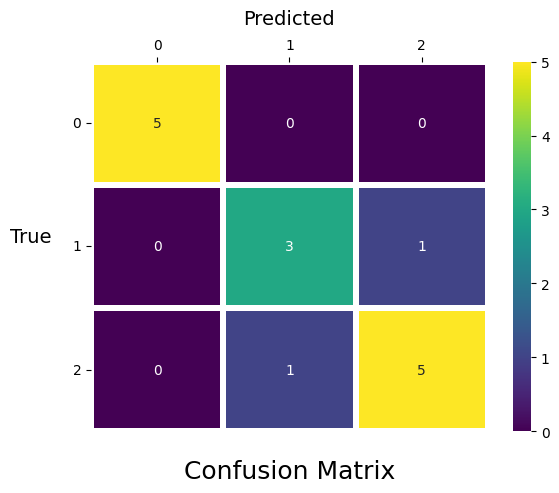

In [ ]:
confusionmatrix = confusion_matrix(ytest, ypred)
fig, ax = plt.subplots()
sns.heatmap(confusionmatrix, annot = True, linewidth = 3, cmap = 'viridis')
plt.xlabel("Confusion Matrix", fontsize = 18, labelpad = 20)
ax.xaxis.tick_top()
plt.ylabel("True", fontsize = 14, rotation = 0, labelpad = 30)
plt.yticks(rotation = 0)
plt.title("Predicted", fontsize = 14, pad = 10)
plt.show()

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.75      0.75         4
           2       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

